In [12]:
import sys;sys.path.append('..')
from ppanlp import *    

In [2]:
ppa = PPA()
qd=dict(min_doc_len=25,max_per_cluster=200,frac=1)

2023-12-06 12:05:04,832 [1] > booting PPACorpus at /home/rh6841/ppa_data/corpus
2023-12-06 12:05:04,833   [2] > reading metadata
2023-12-06 12:05:04,899   [2] < 0.07 seconds
2023-12-06 12:05:04,928 [1] < 0.1 seconds


In [3]:
tm = ppa.topic_model(model_type='bertopic', **qd, force=True)

In [5]:
mdl = tm.model(min_topic_size=50)

2023-12-06 12:05:16,051 [1] > loading or generating model
2023-12-06 12:05:16,053   [2] > importing BERTopic
2023-12-06 12:05:20,283   [2] < 4.23 seconds
2023-12-06 12:05:20,284   [3] > loading documents into memory
2023-12-06 12:05:20,284     [4] > iterating pages by page database
2023-12-06 12:05:20,289       [5] > iterating page database results ({"min_doc_len": 10, "frac_min": 0, "frac_max": 1})
Iterating over page search results: 100%|██████████| 2064515/2064515 [00:31<00:00, 65463.48it/s]
2023-12-06 12:05:51,827       [5] < 31.54 seconds
2023-12-06 12:05:51,828     [4] < 31.54 seconds
2023-12-06 12:05:53,578 < loaded 729,649 documents into memory
2023-12-06 12:05:53,579   [3] < 33.29 seconds
2023-12-06 12:05:53,579   [6] > fitting model
2023-12-06 12:05:53,790 - BERTopic - Embedding - Transforming documents to embeddings.
Batches: 100%|██████████| 22802/22802 [28:51<00:00, 13.17it/s] 
2023-12-06 12:35:32,818 - BERTopic - Embedding - Completed ✓
2023-12-06 12:35:32,822 - BERTopic 

In [6]:
df = mdl.get_topic_info()
df

Topic   Count                                        Name  \
0       -1  466596                   -1_words_upon_who_english   
1        0   15719          0_parliament_government_policy_war   
2        1   11739                        1_thou_sone_thee_thy   
3        2    8942                     2_thee_sun_thou_flowers   
4        3    6811   3_shakespeare_shakespeares_hamlet_theatre   
..     ...     ...                                         ...   
367    366     101         366_rhyme_sonnets_prose_shakespeare   
368    367     101              367_thou_charmst_thee_exercise   
369    368     101        368_hiatuses_hiatus_elision_syllable   
370    369     100       369_syllable_syllables_verse_stressed   
371    370     100  370_handwriting_penmanship_drawing_writing   

                                        Representation  \
0    [words, upon, who, english, word, be, being, b...   
1    [parliament, government, policy, war, constitu...   
2    [thou, sone, thee, thy, herte, oure, ane, hadd...   
3    [thee, sun, thou, flowers, soul, flower, leave...   
4    [shakespeare, shakespeares, hamlet, theatre, c...   
..                                                 ...   
367  [rhyme, sonnets, prose, shakespeare, shakespea...   
368  [thou, charmst, thee, exercise, praise, vain, ...   
369  [hiatuses, hiatus, elision, syllable, syllable...   
370  [syllable, syllables, verse, stressed, verses,...   
371  [handwriting, penmanship, drawing, writing, pe...   

                                   Representative_Docs  
0    [221\nBut neither Clough nor Spedding originat...  
1    [115\nsrsoraroa\ncitizens deprived of the righ...  
2    [Thorgh strenkith of hand and Godes grace\nHe ...  
3    [57\n26. Spring.\nBend down from thy chariot, ...  
4    [150\nthe river side, called the Globe Theatre...  
..                                                 ...  
367  [OII\nΙ ΛΙ\nIII\nAct.\nwaAANUD\nAAAA\n!!!!!!!!...  
368  [43\nEXERCISE 139. rm.\nArm, warm, harm, form,...  
369  [26. Our conclusions, then, are these:\na. In ...  
370  [which the first is 'that there shall never be...  
371  [7 r\n\nProduce Extreme slant, right, so that ...  

[372 rows x 5 columns]

In [10]:
df.Count.sum()

729649

In [11]:
tm.path_model

'/home/rh6841/ppa_data/corpus/data/topicmodels/models/data.bertopic.model.ntopic_50.niter_100.min_doc_len_10.frac_1.max_per_cluster_200/model.bin'

In [8]:
hierarchical_topics = mdl.hierarchical_topics([y for x,y in tm.iter_docs()])

2023-12-06 15:18:35,717 [1] > iterating pages by page database
2023-12-06 15:18:35,727   [2] > iterating page database results ({"min_doc_len": 10, "frac_min": 0, "frac_max": 1})
Iterating over page search results: 100%|██████████| 2064515/2064515 [00:37<00:00, 55398.85it/s]
2023-12-06 15:19:12,995   [2] < 37.27 seconds
2023-12-06 15:19:12,995 [1] < 37.28 seconds
100%|██████████| 370/370 [31:01<00:00,  5.03s/it]


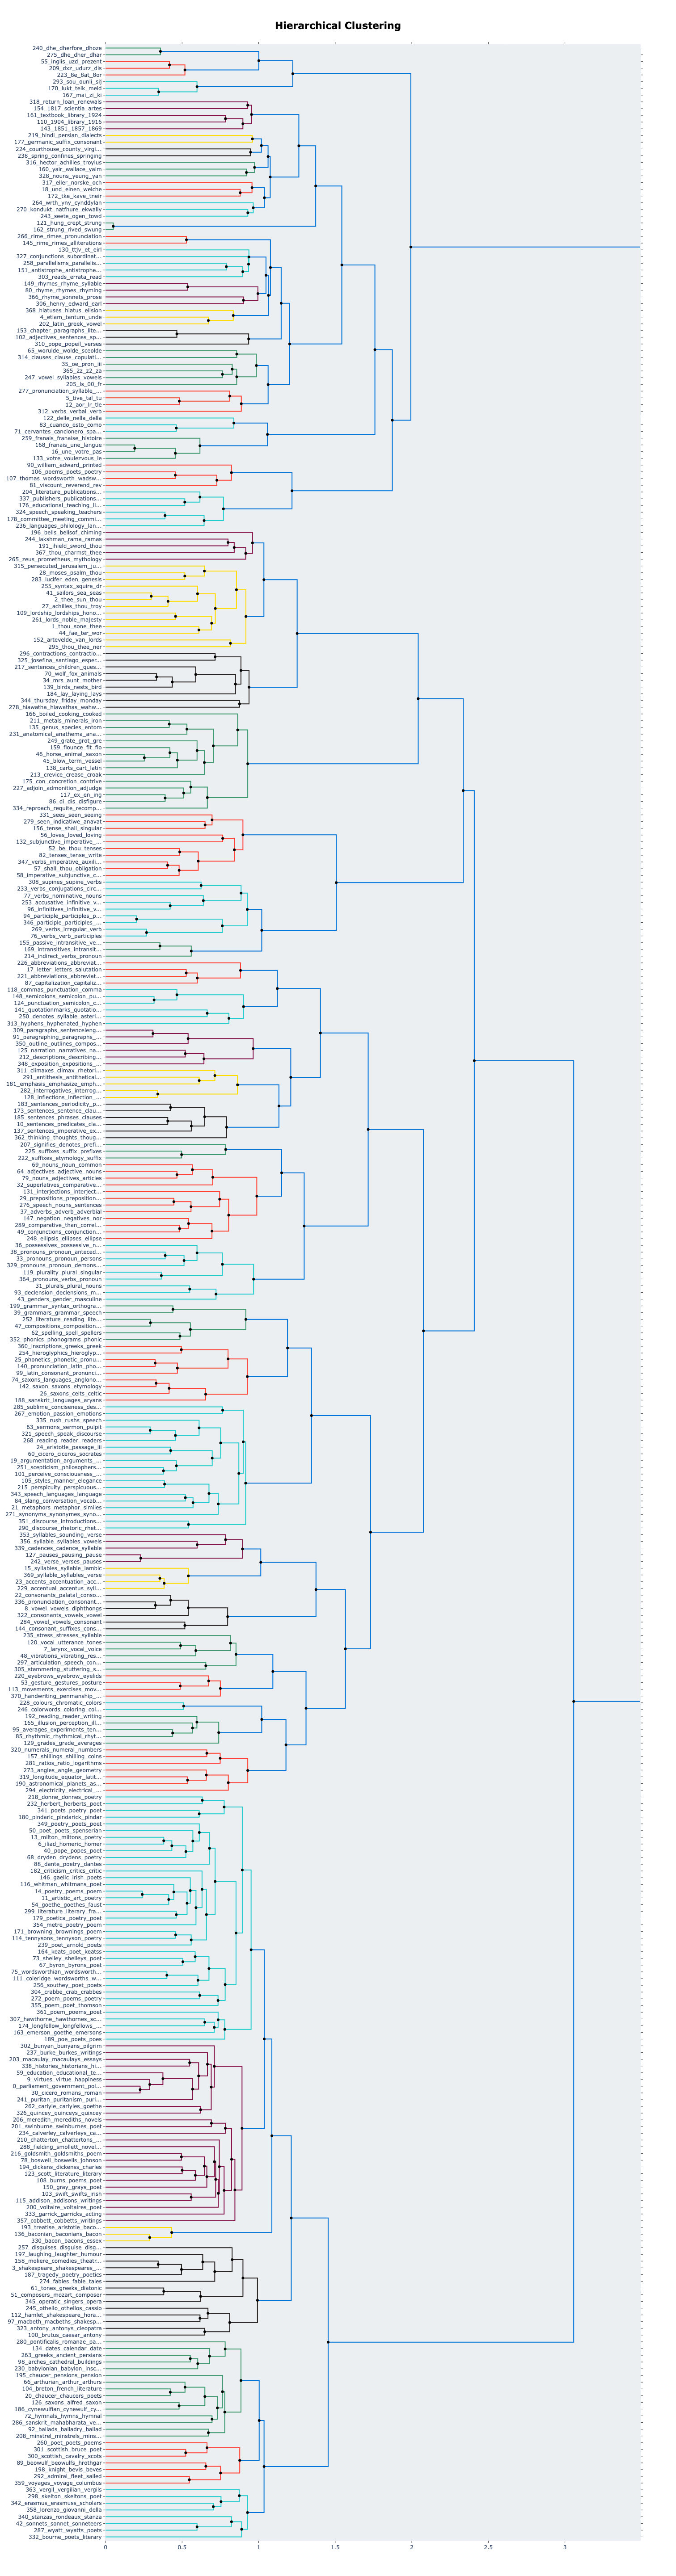

In [9]:
mdl.visualize_hierarchy(hierarchical_topics=hierarchical_topics)